In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

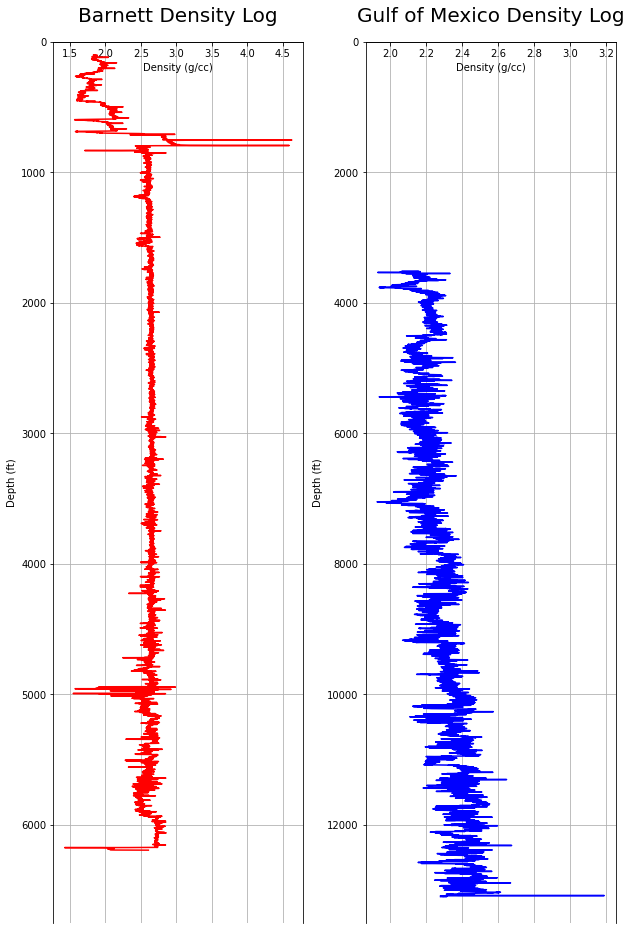

In [2]:
# load barnett shale and gulf of mexico data
barnett = np.loadtxt('Barnett shale data.txt')
gom = np.loadtxt('Gulf of Mexico data.txt')

depth_barnett = barnett[:, 0]; depth_gom = gom[:, 0]
rho_barnett = barnett[:, 1]; rho_gom = gom[:, 1]

# # conversion
# rho_barnett_conv = rho_barnett * 1E+03 # convert g/cm3 to kg/m3
# rho_gom_conv = rho_gom * 1E+03 # convert g/cm3 to kg/m3

# plot barnett and GOM density data
plt.figure(figsize=(9, 13))

plt.subplot(1, 2, 1)
plt.plot(rho_barnett, depth_barnett, 'r')
plt.title("Barnett Density Log", pad=20, size=20)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6750)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
plt.plot(rho_gom, depth_gom, 'b')
plt.title("Gulf of Mexico Density Log", pad=20, size=20)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) # set distance between two plots

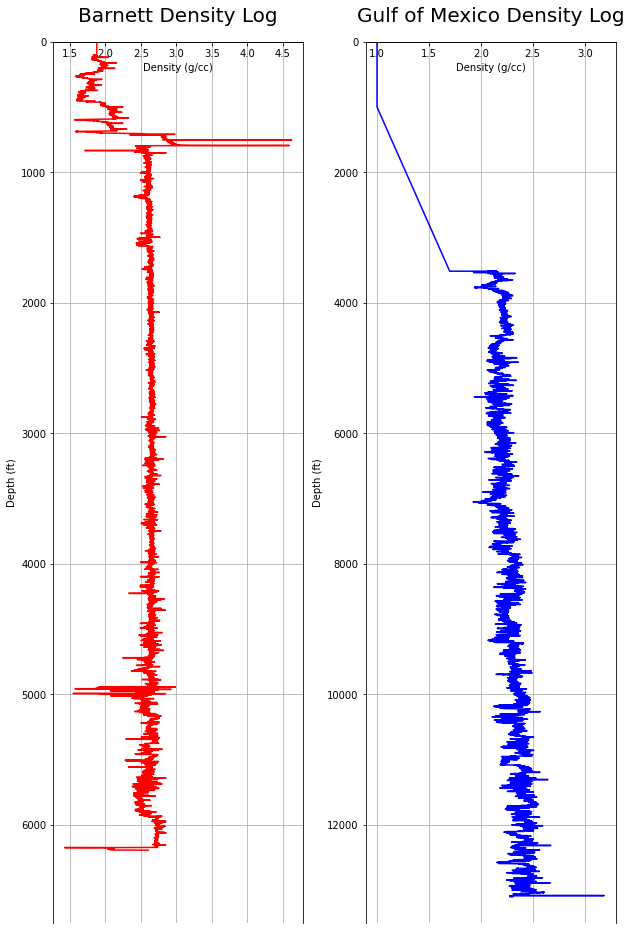

In [3]:
"interpolate and extrapolate data points"

# create average density (dummy) value from the surface (z = 0 ft) to first recorded depth in Barnett Shale
depth_surface_barnett = np.linspace(0, min(depth_barnett), 100)
rho_surface_barnett = np.full(100, 1.8778) # create numpy array of constant density values 1.8778 g/cc

# create average density (dummy) value from the sea surface (z = 0 ft) to seabed to first recorded depth in GOM
depth_seabed_gom = np.linspace(0, 1000, 100) # depth to seabed 1000 ft
rho_seabed_gom = np.full(100, 1) # create numpy array of constant water density values 1 g/cc

depth_surface_gom = np.linspace(1000, min(depth_gom), 100) # depth from seabed to first recorded depth
d1 = 1000; d2 = min(depth_gom)
rho1 = 1; rho2 = 1.7
# interpolation function to connect from seabed to first recorded depth: rho = (((rho2 - rho1) * (depth - 1000)) + 1) / (d2 - d1)
rho_surface_gom = (((rho2 - rho1) * (depth_surface_gom - d1)) / (d2 - d1)) + 1

# append
depth_barnett_new = np.append([depth_surface_barnett], depth_barnett)
rho_barnett_new = np.append([rho_surface_barnett], rho_barnett)
depth_gom_new = np.append([depth_seabed_gom, depth_surface_gom], depth_gom)
rho_gom_new = np.append([rho_seabed_gom, rho_surface_gom], rho_gom)

# plot the interpolated log
# plot barnett and GOM density data
plt.figure(figsize=(9, 13))
plt.subplot(1, 2, 1)
plt.plot(rho_barnett_new, depth_barnett_new, 'r')
plt.title("Barnett Density Log", pad=20, size=20)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6750)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
plt.plot(rho_gom_new, depth_gom_new, 'b')
plt.title("Gulf of Mexico Density Log", pad=20, size=20)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) # set distance between two plots

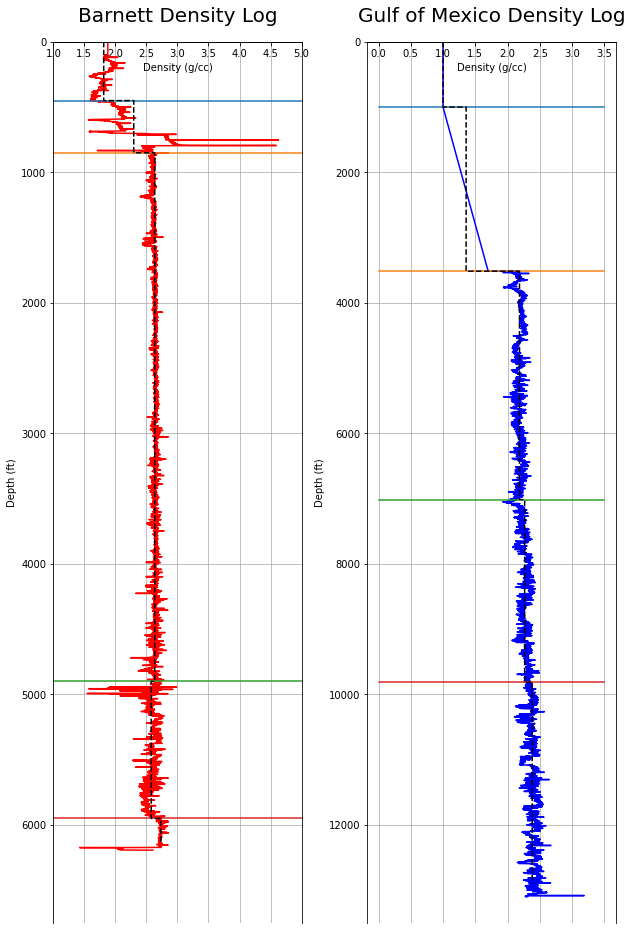

In [5]:
"divide into 5 blocks"

# guess the points (index) of blocks
# barnett
guess_1a = 800; guess_2a = 1600; guess_3a = 9700; guess_4a = 11800
top_1a = depth_barnett_new[guess_1a]; top_2a = depth_barnett_new[guess_2a]; top_3a = depth_barnett_new[guess_3a]; top_4a = depth_barnett_new[guess_4a]
dummy_x_1a = np.linspace(0, 5, 5); dummy_x_2a = np.linspace(0, 5, 5); dummy_x_3a = np.linspace(0, 5, 5); dummy_x_4a = np.linspace(0, 5, 5)
dummy_y_1a = np.full(5, top_1a); dummy_y_2a = np.full(5, top_2a); dummy_y_3a = np.full(5, top_3a); dummy_y_4a = np.full(5, top_4a)
# gom
guess_1b = 100; guess_2b = 200; guess_3b = 3700; guess_4b = 6500
top_1b = depth_gom_new[guess_1b]; top_2b = depth_gom_new[guess_2b]; top_3b = depth_gom_new[guess_3b]; top_4b = depth_gom_new[guess_4b]
dummy_x_1b = np.linspace(0, 3.5, 5); dummy_x_2b = np.linspace(0, 3.5, 5); dummy_x_3b = np.linspace(0, 3.5, 5); dummy_x_4b = np.linspace(0, 3.5, 5)
dummy_y_1b = np.full(5, top_1b); dummy_y_2b = np.full(5, top_2b); dummy_y_3b = np.full(5, top_3b); dummy_y_4b = np.full(5, top_4b)

# averaging barnett blocks
depthblock_1a = depth_barnett_new[:(guess_1a+1)]; depthblock_2a = depth_barnett_new[guess_1a:(guess_2a+1)]; depthblock_3a = depth_barnett_new[guess_2a:(guess_3a+1)] 
depthblock_4a = depth_barnett_new[guess_3a:(guess_4a+1)]; depthblock_5a = depth_barnett_new[guess_4a:(len(depth_barnett))]

rhoblock_1a = rho_barnett_new[:(guess_1a+1)]; rhoblock_2a = rho_barnett_new[guess_1a:(guess_2a+1)]; rhoblock_3a = rho_barnett_new[guess_2a:(guess_3a+1)] 
rhoblock_4a = rho_barnett_new[guess_3a:(guess_4a+1)]; rhoblock_5a = rho_barnett_new[guess_4a:(len(depth_barnett))]

average_1a = np.mean(rhoblock_1a); average_2a = np.mean(rhoblock_2a); average_3a = np.mean(rhoblock_3a)
average_4a = np.mean(rhoblock_4a); average_5a = np.mean(rhoblock_5a)

# averaging gom blocks
depthblock_1b = depth_gom_new[:(guess_1b+1)]; depthblock_2b = depth_gom_new[guess_1b:(guess_2b+1)]; depthblock_3b = depth_gom_new[guess_2b:(guess_3b+1)] 
depthblock_4b = depth_gom_new[guess_3b:(guess_4b+1)]; depthblock_5b = depth_gom_new[guess_4b:(len(depth_gom))]
rhoblock_1b = rho_gom_new[:(guess_1b+1)]; rhoblock_2b = rho_gom_new[guess_1b:(guess_2b+1)]; rhoblock_3b = rho_gom_new[guess_2b:(guess_3b+1)] 
rhoblock_4b = rho_gom_new[guess_3b:(guess_4b+1)]; rhoblock_5b = rho_gom_new[guess_4b:(len(depth_gom))]

average_1b = np.mean(rhoblock_1b); average_2b = np.mean(rhoblock_2b); average_3b = np.mean(rhoblock_3b)
average_4b = np.mean(rhoblock_4b); average_5b = np.mean(rhoblock_5b)

# create averaged barnett blocks
mean_1a = np.full((len(depthblock_1a)), (average_1a)); mean_2a = np.full((len(depthblock_2a)), (average_2a)); mean_3a = np.full((len(depthblock_3a)), (average_3a))
mean_4a = np.full((len(depthblock_4a)), (average_4a)); mean_5a = np.full((len(depthblock_5a)), (average_5a))
depth_block_barnett = np.concatenate([depthblock_1a, depthblock_2a, depthblock_3a, depthblock_4a, depthblock_5a])
rho_block_barnett = np.concatenate([mean_1a, mean_2a, mean_3a, mean_4a, mean_5a])

# create averaged gom blocks
mean_1b = np.full((len(depthblock_1b)), (average_1b)); mean_2b = np.full((len(depthblock_2b)), (average_2b)); mean_3b = np.full((len(depthblock_3b)), (average_3b))
mean_4b = np.full((len(depthblock_4b)), (average_4b)); mean_5b = np.full((len(depthblock_5b)), (average_5b))
depth_block_gom = np.concatenate([depthblock_1b, depthblock_2b, depthblock_3b, depthblock_4b, depthblock_5b])
rho_block_gom = np.concatenate([mean_1b, mean_2b, mean_3b, mean_4b, mean_5b])


# plot barnett and GOM density data
plt.figure(figsize=(9, 13))

plt.subplot(1, 2, 1)
plt.plot(rho_barnett_new, depth_barnett_new, 'r')
plt.plot(dummy_x_1a, dummy_y_1a); plt.plot(dummy_x_2a, dummy_y_2a); plt.plot(dummy_x_3a, dummy_y_3a); plt.plot(dummy_x_4a, dummy_y_4a)
plt.plot(rho_block_barnett, depth_block_barnett, '--', color='black')
plt.title("Barnett Density Log", pad=20, size=20)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6750); plt.xlim(1, 5)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
plt.plot(rho_gom_new, depth_gom_new, 'b')
plt.plot(dummy_x_1b, dummy_y_1b); plt.plot(dummy_x_2b, dummy_y_2b); plt.plot(dummy_x_3b, dummy_y_3b); plt.plot(dummy_x_4b, dummy_y_4b)
plt.plot(rho_block_gom, depth_block_gom, '--', color='black')
plt.title("Gulf of Mexico Density Log", pad=20, size=20)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

# plt.subplot(1, 3, 3)
# plt.plot(rho_block_barnett, depth_block_barnett, color='black')

plt.tight_layout(pad=1.0) # set distance between two plots


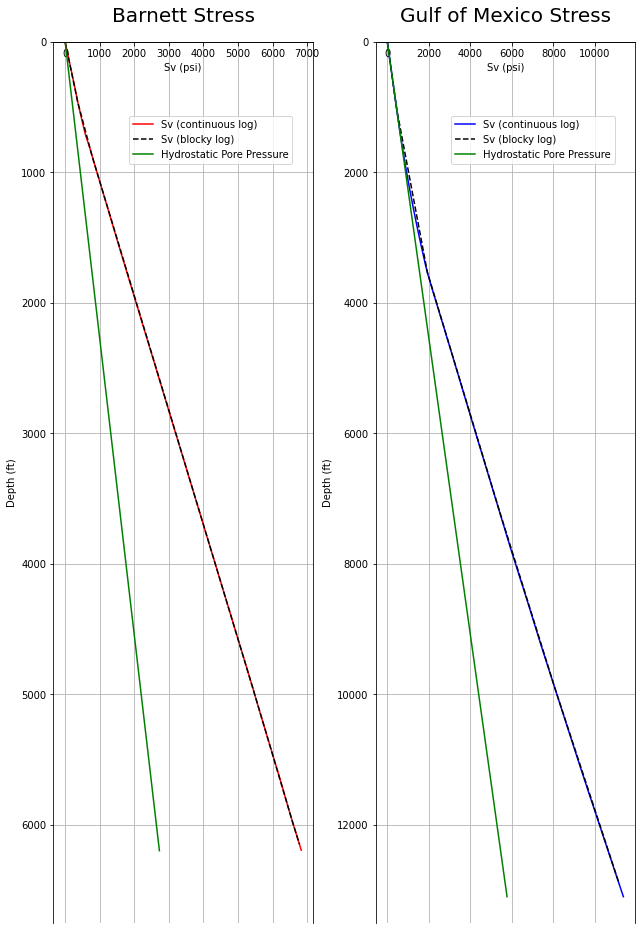

In [6]:
"calculate overburden stress from continuous log"

# conversion
rho_barnett_conv = rho_barnett_new * 1E+03 # convert g/cm3 to kg/m3
rho_gom_conv = rho_gom_new * 1E+03 # convert g/cm3 to kg/m3

"barnett"
thickness_barnett = np.array([j-i for i, j in zip(depth_barnett_new[:-1], depth_barnett_new[1:])])
thickness_barnett = np.append([(min(depth_barnett_new) - 0)], thickness_barnett)

# multiply thickness by density (barnett)
rhogz_barnett = rho_barnett_conv * (thickness_barnett * 0.3048) * 9.8 # thickness divided by 0.3048 to convert ft to m
rhogz_barnett = rhogz_barnett * 0.000145038 # convert Pa to psi

# cumulative sum, calculate Sv (barnett)
sv_barnett = np.cumsum(rhogz_barnett)

"gom"
thickness_gom = np.array([j-i for i, j in zip(depth_gom_new[:-1], depth_gom_new[1:])])
thickness_gom = np.append([(min(depth_gom_new) - 0)], thickness_gom)

# multiply thickness by density (gom)
rhogz_gom = rho_gom_conv * (thickness_gom * 0.3048) * 9.8 # thickness divided by 0.3048 to convert ft to m
rhogz_gom = rhogz_gom * 0.000145038 # convert Pa to psi

# cumulative sum, calculate Sv (gom)
sv_gom = np.cumsum(rhogz_gom)

"calculate overburden stress from blocky log"
# conversion
rho_block_barnett_conv = rho_block_barnett * 1E+03 # convert g/cm3 to kg/m3
rho_block_gom_conv = rho_block_gom * 1E+03 # convert g/cm3 to kg/m3

"barnett"
thickness_block_barnett = np.array([j-i for i, j in zip(depth_block_barnett[:-1], depth_block_barnett[1:])])
thickness_block_barnett = np.append([(min(depth_block_barnett) - 0)], thickness_block_barnett)

# multiply thickness by density (barnett)
rhogz_block_barnett = rho_block_barnett_conv * (thickness_block_barnett * 0.3048) * 9.8 # thickness divided by 0.3048 to convert ft to m
rhogz_block_barnett = rhogz_block_barnett * 0.000145038 # convert Pa to psi

# cumulative sum, calculate Sv (barnett)
sv_block_barnett = np.cumsum(rhogz_block_barnett)

"gom"
thickness_block_gom = np.array([j-i for i, j in zip(depth_block_gom[:-1], depth_block_gom[1:])])
thickness_block_gom = np.append([(min(depth_block_gom) - 0)], thickness_block_gom)

# multiply thickness by density (gom)
rhogz_block_gom = rho_block_gom_conv * (thickness_block_gom * 0.3048) * 9.8 # thickness divided by 0.3048 to convert ft to m
rhogz_block_gom = rhogz_block_gom * 0.000145038 # convert Pa to psi

# cumulative sum, calculate Sv (gom)
sv_block_gom = np.cumsum(rhogz_block_gom)
"calculate hydrostatic pore pressure"
pp_hydro_barnett = 0.44 * depth_barnett_new
pp_hydro_gom = 0.44 * depth_gom_new

# plot barnett Sv, hydrostatic pore pressure result

plt.figure(figsize=(9, 13))
plt.subplot(1, 2, 1)
p1 = plt.plot(sv_barnett, depth_barnett_new, color='red')
p2 = plt.plot(sv_block_barnett, depth_block_barnett, '--', color='black')
p3 = plt.plot(pp_hydro_barnett, depth_barnett_new, color='green')
plt.legend((p1[0], p2[0], p3[0]), ('Sv (continuous log)', 'Sv (blocky log)', 'Hydrostatic Pore Pressure'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.title("Barnett Stress", pad=20, size=20)
plt.xlabel("Sv (psi)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6750)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
p4 = plt.plot(sv_gom, depth_gom_new, color='blue')
p5 = plt.plot(sv_block_gom, depth_block_gom, '--', color='black')
p6 = plt.plot(pp_hydro_gom, depth_gom_new, color='green')
plt.legend((p4[0], p5[0], p6[0]), ('Sv (continuous log)', 'Sv (blocky log)', 'Hydrostatic Pore Pressure'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.title("Gulf of Mexico Stress", pad=20, size=20)
plt.xlabel("Sv (psi)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')
plt.tight_layout(pad=1.0) # set distance between two plots

<ipython-input-7-0166f268bff1>:3: RuntimeWarning: invalid value encountered in true_divide
  ovbgrad_barnett = sv_barnett / depth_barnett_new
<ipython-input-7-0166f268bff1>:4: RuntimeWarning: invalid value encountered in true_divide
  ovbgrad_block_barnett = sv_block_barnett / depth_block_barnett
<ipython-input-7-0166f268bff1>:5: RuntimeWarning: invalid value encountered in true_divide
  ovbgrad_gom = sv_gom / depth_gom_new
<ipython-input-7-0166f268bff1>:6: RuntimeWarning: invalid value encountered in true_divide
  ovbgrad_block_gom = sv_block_gom / depth_block_gom


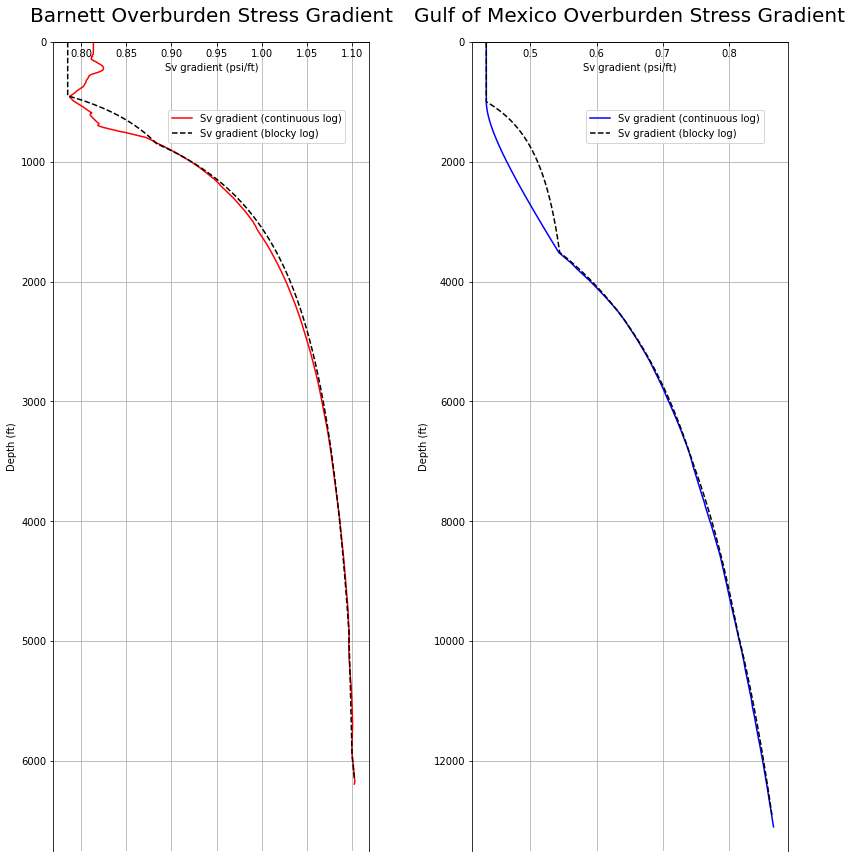

In [7]:
"calculate overburden stress gradient"

ovbgrad_barnett = sv_barnett / depth_barnett_new
ovbgrad_block_barnett = sv_block_barnett / depth_block_barnett
ovbgrad_gom = sv_gom / depth_gom_new
ovbgrad_block_gom = sv_block_gom / depth_block_gom

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
p1 = plt.plot(ovbgrad_barnett, depth_barnett_new, color='red')
p2 = plt.plot(ovbgrad_block_barnett, depth_block_barnett, '--', color='black')
plt.legend((p1[0], p2[0]), ('Sv gradient (continuous log)', 'Sv gradient (blocky log)'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.title("Barnett Overburden Stress Gradient", pad=20, size=20)
plt.xlabel("Sv gradient (psi/ft)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6750)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
p3 = plt.plot(ovbgrad_gom, depth_gom_new, color='blue')
p4 = plt.plot(ovbgrad_block_gom, depth_block_gom, '--', color='black')
plt.legend((p3[0], p4[0]), ('Sv gradient (continuous log)', 'Sv gradient (blocky log)'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.title("Gulf of Mexico Overburden Stress Gradient", pad=20, size=20)
plt.xlabel("Sv gradient (psi/ft)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) # set distance between two plots

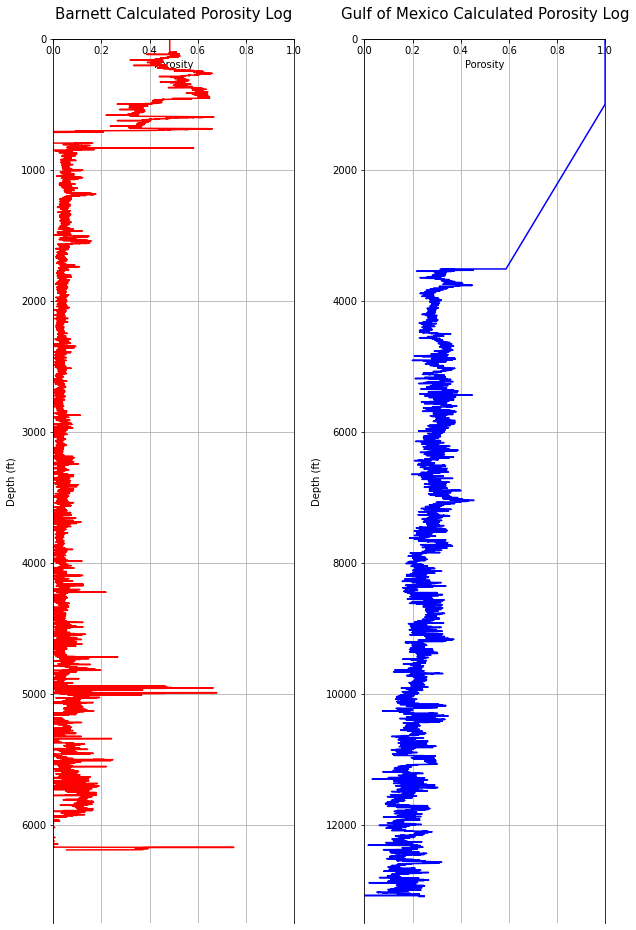

In [8]:
rhom = 2.7 # matrix density, g/cm3
rhof = 1 # brine porosity, g/cm3

# equation: rhob = ((1 - poro) * rhom) + (poro * rhof)

poro_barnett = (rho_barnett_new - rhom) / (rhof - rhom)
poro_gom = (rho_gom_new - rhom) / (rhof - rhom)

# plot barnett and GOM calculated porosity
plt.figure(figsize=(9, 13))

plt.subplot(1, 2, 1)
plt.plot(poro_barnett, depth_barnett_new, 'r')
plt.title("Barnett Calculated Porosity Log", pad=20, size=15)
plt.xlabel("Porosity"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6750); plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
plt.plot(poro_gom, depth_gom_new, 'b')
plt.title("Gulf of Mexico Calculated Porosity Log", pad=20, size=15)
plt.xlabel("Porosity"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500); plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) # set distance between two plots